## **IMPORT**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **LOAD DATA**

In [18]:
fifa15 = pd.read_csv("D:\Ahmed\DataSets\FIfa Dataset\players_15.csv")
fifa16 = pd.read_csv("D:\Ahmed\DataSets\FIfa Dataset\players_16.csv")
fifa17 = pd.read_csv("D:\Ahmed\DataSets\FIfa Dataset\players_17.csv")
fifa18 = pd.read_csv("D:\Ahmed\DataSets\FIfa Dataset\players_18.csv")
fifa19 = pd.read_csv("D:\Ahmed\DataSets\FIfa Dataset\players_19.csv")
fifa20 = pd.read_csv("D:\Ahmed\DataSets\FIfa Dataset\players_20.csv")
fifa21 = pd.read_csv("D:\Ahmed\DataSets\FIfa Dataset\players_21.csv")

fifa_years = [fifa15, fifa16, fifa17, fifa18, fifa19, fifa20]

valid_ids = set(fifa21['sofifa_id'])

In [19]:
fifa_years[0].head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,Spain Primera Division,1.0,93,95,100500000,550000,CF,Left,5,3,4,Medium/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (AI), One Club Pl...",84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,NaN,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,Spain Primera Division,1.0,92,92,79000000,375000,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,NaN,22,31,23,7,11,15,14,11,91+1,91+1,91+1,89+3,91+1,91+1,91+1,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,German 1. Bundesliga,1.0,90,90,54500000,275000,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,NaN,29,26,26,10,8,11,5,15,84+3,84+3,84+3,88+2,87+3,87+3,87+3,88+2,88+2,88+2,88+2,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,French Ligue 1,1.0,90,90,52500000,275000,ST,Right,5,4,4,Medium/Low,Normal,Yes,NaN,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,NaN,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,NaN,25,41,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manu

# **Data Exploration**

In [20]:
df_history = pd.DataFrame()
for i, df in enumerate(fifa_years):
    year = 15 + i
    temp = df.copy()
    temp['fifa_version'] = year
    df_history = pd.concat([df_history, temp], axis=0)

df_history = df_history.sort_values(by=['sofifa_id','fifa_version']).reset_index(drop=True)

In [21]:
pd.set_option('display.max_columns', 106)
pd.set_option('display.max_rows', 20000)

In [22]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103897 entries, 0 to 103896
Columns: 107 entries, sofifa_id to fifa_version
dtypes: float64(19), int64(44), object(44)
memory usage: 84.8+ MB


In [23]:
df_history.describe().T

,count,mean,std,min,25%,50%,75%,max
sofifa_id,103897.0,2.052845e+05,3.519191e+04,2.0,190640.0,212194.0,228894.0,254664.0
age,103897.0,2.507994e+01,4.635020e+00,16.0,21.0,25.0,28.0,47.0
height_cm,103897.0,1.811920e+02,6.693601e+00,154.0,176.0,181.0,186.0,208.0
weight_kg,103897.0,7.534641e+01,6.970718e+00,49.0,70.0,75.0,80.0,110.0
league_rank,102553.0,1.382154e+00,7.534279e-01,0.0,1.0,1.0,2.0,4.0
overall,103897.0,6.569903e+01,7.109521e+00,40.0,61.0,66.0,70.0,94.0
potential,103897.0,7.059521e+01,6.329314e+00,40.0,66.0,70.0,75.0,95.0
value_eur,103897.0,2.012821e+06,4.843823e+06,0.0,250000.0,600000.0,1500000.0,123000000.0
wage_eur,103897.0,1.170169e+04,2.292571e+04,0.0,2000.0,4000.0,10000.0,575000.0
international_reputation,103897.0,1.116336e+00,3.943961e-01,1.0,1.0,1.0,1.0,5.0


# **Data Cleaning & Preprocessing**

In [24]:
rmv = ['dob','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number','player_tags','ls','st',	'rs',	'lw',	'lf',	'cf',	'rf',	'rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb'	,'rb']
df_history = df_history.drop(rmv, axis = 1)

In [25]:
df_history.isnull().sum()*100/len(df_history)

sofifa_id                      0.000000
short_name                     0.000000
age                            0.000000
height_cm                      0.000000
weight_kg                      0.000000
nationality                    0.000000
club_name                      1.293589
league_name                    1.293589
league_rank                    1.293589
overall                        0.000000
potential                      0.000000
value_eur                      0.000000
wage_eur                       0.000000
player_positions               0.000000
preferred_foot                 0.000000
international_reputation       0.000000
weak_foot                      0.000000
skill_moves                    0.000000
work_rate                      0.000000
release_clause_eur            51.408607
team_position                  1.293589
team_jersey_number             1.293589
joined                         7.496848
contract_valid_until           1.293589
pace                          11.141804


In [26]:
df_history.fillna(0, inplace=True)

# **Data Processing & Feature Engineering**

In [27]:
df_history['BMI'] = df_history ['weight_kg'] / (df_history['height_cm'] / 100) ** 2

In [28]:
df_history['pot_inc'] = ((df_history['potential']-df_history['overall'])/df_history['overall'])*100

In [29]:
df_history.rename(columns={'pot_inc':'potential_increase'},inplace=True)

In [30]:
features_players = ['pace','shooting','passing','dribbling','defending','physic','age']
features_gk = ['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','age']
base_cols = ['sofifa_id', 'overall', 'club_name', 'potential', 'player_positions','short_name']

In [31]:
'''df_list = []
for i, df in enumerate(fifa_years):
    temp = df.copy()
    temp['fifa_version'] = 15 + i
    df_list.append(temp)

temp21 = fifa21.copy()
temp21['fifa_version'] = 21
df_list.append(temp21)

df_history = pd.concat(df_list, axis=0, ignore_index=True)'''

"df_list = []\nfor i, df in enumerate(fifa_years):\n    temp = df.copy()\n    temp['fifa_version'] = 15 + i\n    df_list.append(temp)\n\ntemp21 = fifa21.copy()\ntemp21['fifa_version'] = 21\ndf_list.append(temp21)\n\ndf_history = pd.concat(df_list, axis=0, ignore_index=True)"

In [32]:
names_positions = df_history[['sofifa_id','short_name','player_positions']].drop_duplicates(subset='sofifa_id', keep='last')

df_avg_players = df_history.groupby('sofifa_id')[features_players].mean().reset_index()
df_avg_gk = df_history.groupby('sofifa_id')[features_gk].mean().reset_index()

df_avg_players = pd.merge(df_avg_players, names_positions, on='sofifa_id', how='left')
df_avg_gk = pd.merge(df_avg_gk, names_positions, on='sofifa_id', how='left')

# **DATA VISUALIZATION** (فقط 2015–2020)
avg_overall_per_year = df_history.groupby('fifa_version')['overall'].mean().reset_index()

# **Data Visualization**

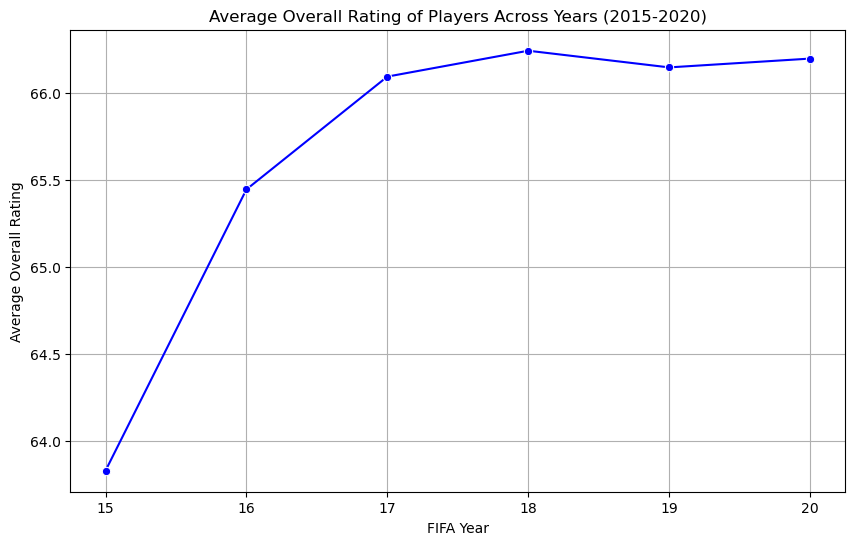

In [33]:
avg_overall_per_year = df_history.groupby('fifa_version')['overall'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_overall_per_year, x='fifa_version', y='overall', marker='o', color='blue')
plt.title("Average Overall Rating of Players Across Years (2015-2020)")
plt.xlabel("FIFA Year")
plt.ylabel("Average Overall Rating")
plt.xticks(avg_overall_per_year['fifa_version'])
plt.grid(True)
plt.show()

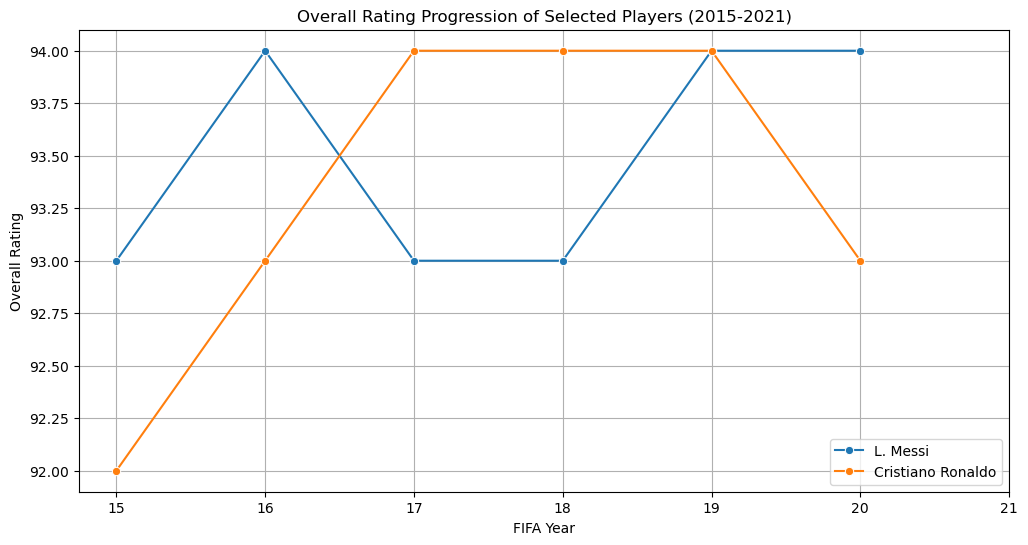

In [34]:
sel_players = ['L. Messi', 'Cristiano Ronaldo']

plt.figure(figsize=(12,6))
for player in sel_players:
    player_history = df_history[df_history['short_name'] == player]
    sns.lineplot(data=player_history, x='fifa_version', y='overall', marker='o', label=player)

plt.title("Overall Rating Progression of Selected Players (2015-2021)")
plt.xlabel("FIFA Year")
plt.ylabel("Overall Rating")
plt.xticks(range(15,22))
plt.legend()
plt.grid(True)
plt.show()

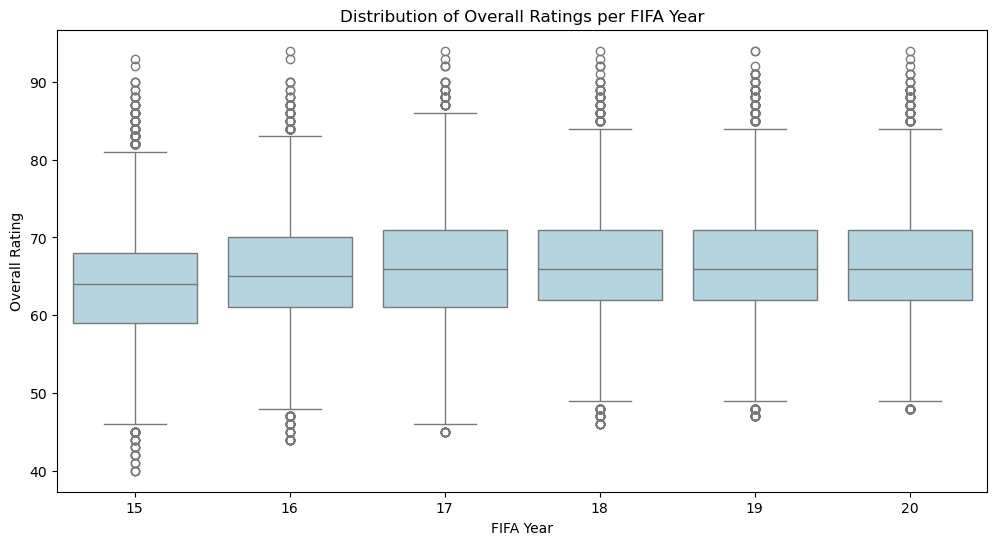

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_history, x='fifa_version', y='overall', color='lightblue')
plt.title("Distribution of Overall Ratings per FIFA Year")
plt.xlabel("FIFA Year")
plt.ylabel("Overall Rating")
plt.show()

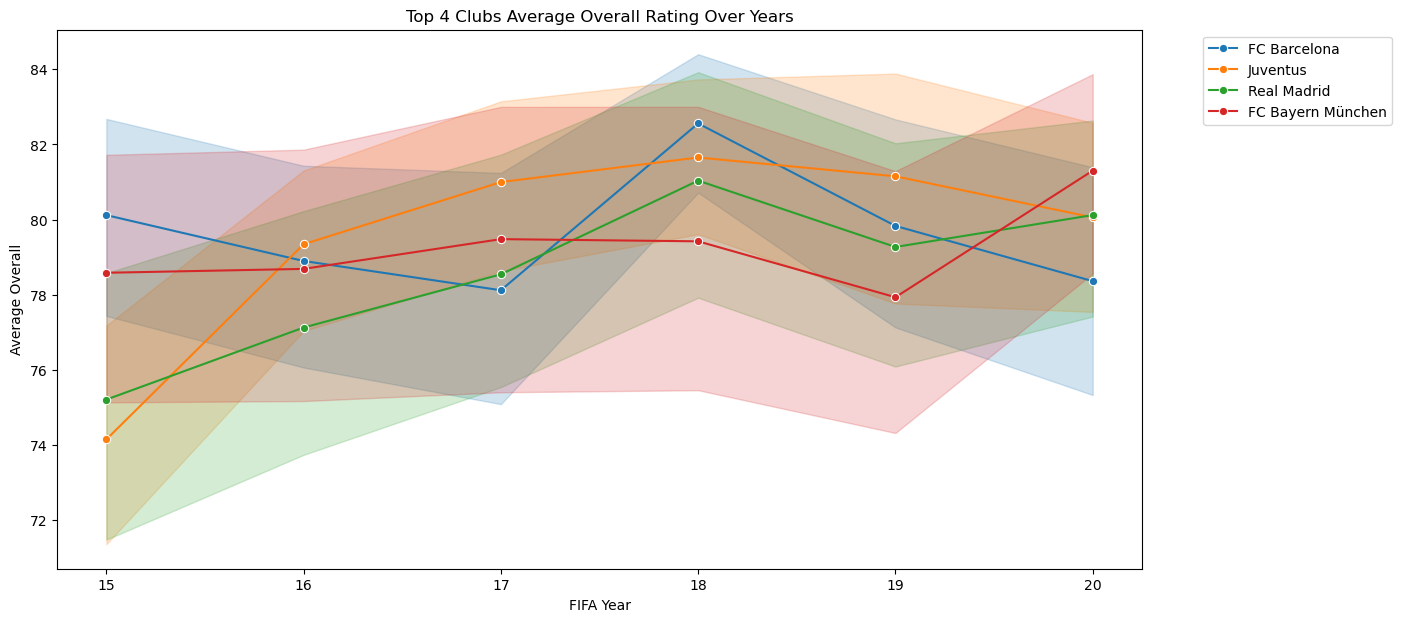

In [36]:
top_clubs = df_history.groupby('club_name')['overall'].mean().nlargest(4).index
df_top_clubs = df_history[df_history['club_name'].isin(top_clubs)]

plt.figure(figsize=(14,7))
sns.lineplot(data=df_top_clubs, x='fifa_version', y='overall', hue='club_name', marker='o')
plt.title("Top 4 Clubs Average Overall Rating Over Years")
plt.xlabel("FIFA Year")
plt.ylabel("Average Overall")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

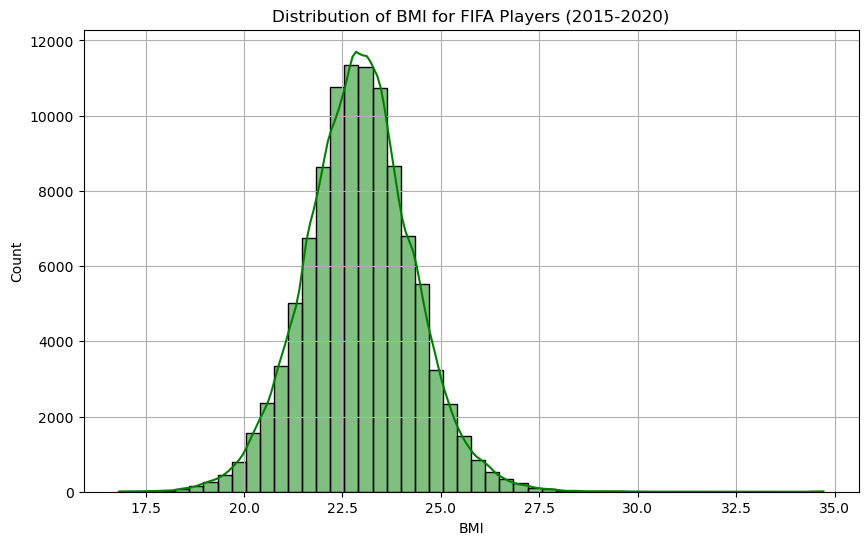

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df_history['BMI'], bins=50, kde=True, color='green')
plt.title("Distribution of BMI for FIFA Players (2015-2020)")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.grid(True)
plt.show()

C:\Users\XxxSa\AppData\Local\Temp\ipykernel_29484\3960279217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_history[df_history['player_positions'].isin(top_positions)],x='player_positions', y='BMI', palette='coolwarm')


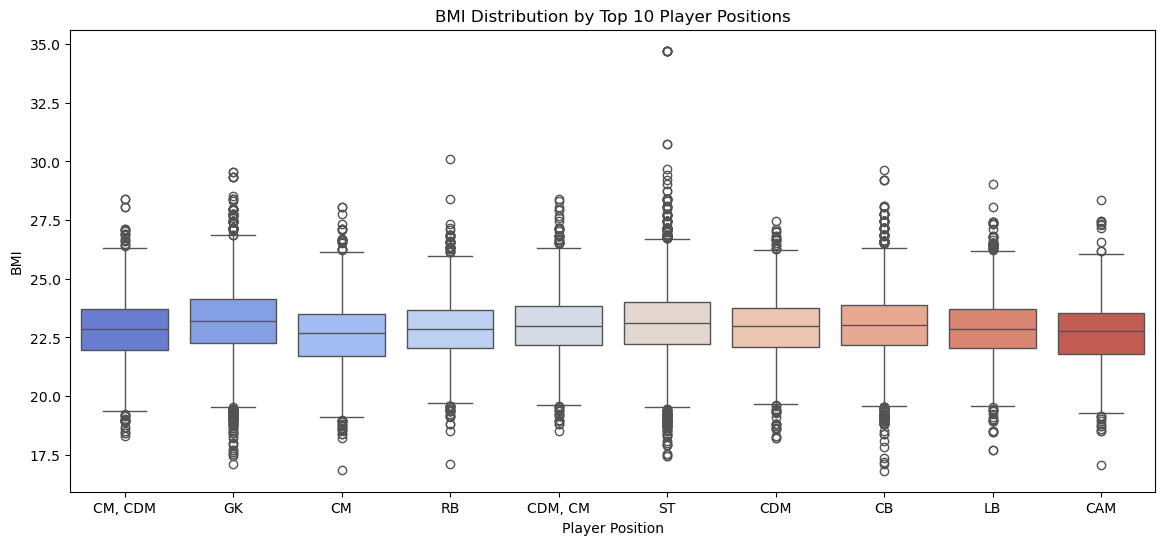

In [38]:
top_positions = df_history['player_positions'].value_counts().head(10).index
plt.figure(figsize=(14,6))
sns.boxplot(data=df_history[df_history['player_positions'].isin(top_positions)],x='player_positions', y='BMI', palette='coolwarm')

plt.title("BMI Distribution by Top 10 Player Positions")
plt.xlabel("Player Position")
plt.ylabel("BMI")
plt.xticks(rotation=0)
plt.show()

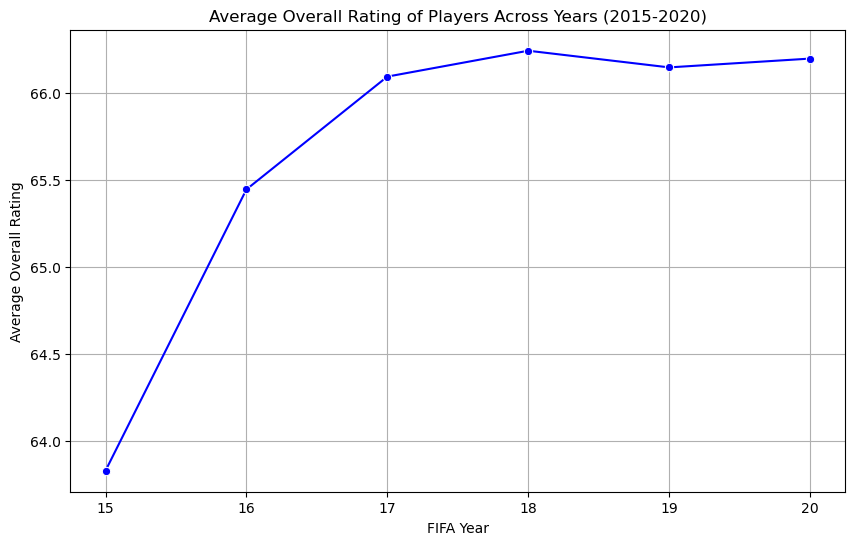

In [53]:
avg_overall_per_year = df_history.groupby('fifa_version')['overall'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_overall_per_year, x='fifa_version', y='overall', marker='o', color='blue')
plt.title("Average Overall Rating of Players Across Years (2015-2020)")
plt.xlabel("FIFA Year")
plt.ylabel("Average Overall Rating")
plt.xticks(avg_overall_per_year['fifa_version'])
plt.grid(True)
plt.show()


# **Machine Learning (Model Building & Evaluation)**

PLAYERS WITHOUT GK

In [54]:
players = ~df_avg_players['player_positions'].str.contains('GK', na=False)
df_players = df_avg_players[players]

df_fifa21_players = fifa21[fifa21['sofifa_id'].isin(df_players['sofifa_id'])]

X_players = df_players.set_index('sofifa_id').loc[df_fifa21_players['sofifa_id'], features_players]
y_players = df_fifa21_players.set_index('sofifa_id')['overall']

In [55]:
scaler_players = StandardScaler()
X_players_scaled = scaler_players.fit_transform(X_players)

X_train, X_test, y_train, y_test = train_test_split(X_players_scaled, y_players, test_size=0.2, random_state=42)
model_players = RandomForestRegressor(n_estimators=200, random_state=42)

In [56]:
model_players.fit(X_train, y_train)
y_pred_players = model_players.predict(X_test)

print("Players R2:", r2_score(y_test, y_pred_players))
print("Players RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_players)))

Players R2: 0.7139717105466745
Players RMSE: 3.3922117207842284


GK ONLY

In [57]:
gk = df_avg_gk['player_positions'].str.contains('GK', na=False)
df_gk = df_avg_gk[gk]

df_fifa21_gk = fifa21[fifa21['sofifa_id'].isin(df_gk['sofifa_id'])]

X_gk = df_gk.set_index('sofifa_id').loc[df_fifa21_gk['sofifa_id'], features_gk]
y_gk = df_fifa21_gk.set_index('sofifa_id')['overall']

In [58]:
scaler_gk = StandardScaler()
X_gk_scaled = scaler_gk.fit_transform(X_gk)

X_train_gk, X_test_gk, y_train_gk, y_test_gk = train_test_split(X_gk_scaled, y_gk, test_size=0.2, random_state=42)
model_gk = RandomForestRegressor(n_estimators=200, random_state=42)

In [59]:
model_gk.fit(X_train_gk, y_train_gk)
y_pred_gk = model_gk.predict(X_test_gk)

print("GK R2:", r2_score(y_test_gk, y_pred_gk))
print("GK RMSE:", np.sqrt(mean_squared_error(y_test_gk, y_pred_gk)))

GK R2: 0.7391880050883075
GK RMSE: 3.4395648205863485


Predictions & Evaluation

In [60]:
df_pred_players = df_fifa21_players[['sofifa_id','short_name']].copy()
df_pred_players['predicted_overall_21'] = model_players.predict(scaler_players.transform(X_players))
df_pred_players['actual_overall_21'] = df_fifa21_players['overall'].values
df_pred_players['player_type'] = 'Player'

df_pred_gk = df_fifa21_gk[['sofifa_id','short_name']].copy()
df_pred_gk['predicted_overall_21'] = model_gk.predict(scaler_gk.transform(X_gk))
df_pred_gk['actual_overall_21'] = df_fifa21_gk['overall'].values
df_pred_gk['player_type'] = 'GK'

df_pred_all = pd.concat([df_pred_players, df_pred_gk], axis=0).sort_values('sofifa_id').reset_index(drop=True)

In [61]:
overall_r2 = r2_score(df_pred_all['actual_overall_21'], df_pred_all['predicted_overall_21'])
overall_rmse = np.sqrt(mean_squared_error(df_pred_all['actual_overall_21'], df_pred_all['predicted_overall_21']))

print(f"\nOverall R2 (All Players): {overall_r2:.4f}")
print(f"Overall RMSE (All Players): {overall_rmse:.4f}")


Overall R2 (All Players): 0.9128
Overall RMSE (All Players): 1.8780


In [62]:
df_pred_all.head(20)

,sofifa_id,short_name,predicted_overall_21,actual_overall_21,player_type
0,41,Iniesta,83.035,81,Player
1,1179,G. Buffon,81.920,82,GK
2,2147,M. Stekelenburg,72.795,72,GK
3,2702,K. Ellison,60.345,58,Player
4,3281,Tarantini,69.860,72,Player
5,3467,Yuri,69.260,71,Player
6,9014,A. Robben,83.300,80,Player
7,10899,C. Porter,63.180,63,Player
8,11381,M. Gilks,66.205,64,GK
9,18115,Rúben Fernandes,70.640,70,Player
